In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\archive (1)\KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

Does each row represents an indviual element (Ad)?

In [5]:
len(df) == df['ad_id'].nunique()

True

How many campaigns do we have?

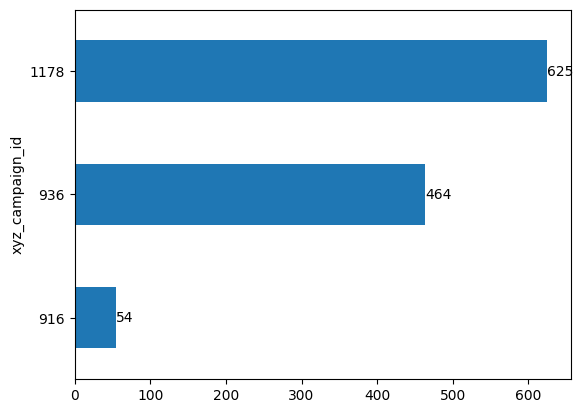

In [7]:
ax = df['xyz_campaign_id'].value_counts().sort_values(ascending=True).plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Lets take a look to the age distribution now. 

There is a preference for the category 30-34

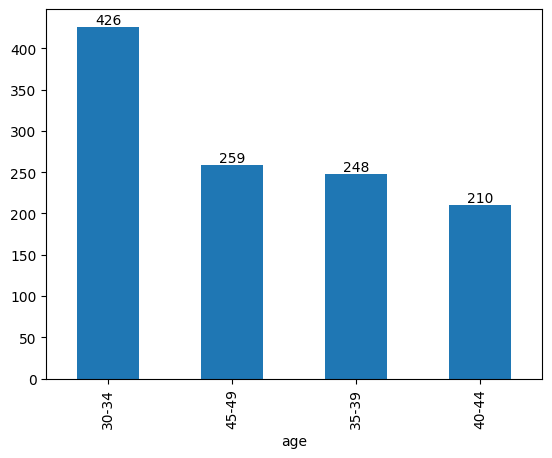

In [8]:
ax = df['age'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Lets take a look to the gender distribution

Genders are almost equal with a slight bigger ammount of males. 

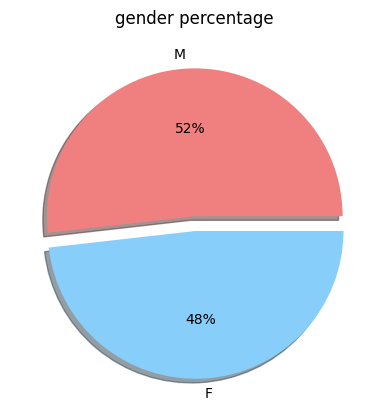

In [9]:
x = df['gender'].value_counts()
y = x.index
plt.pie(x=x, labels = y,colors =['lightcoral','lightskyblue'],autopct='%.0f%%',explode = (0,0.1),shadow = True)
plt.title('gender percentage', color = "black")
plt.show()

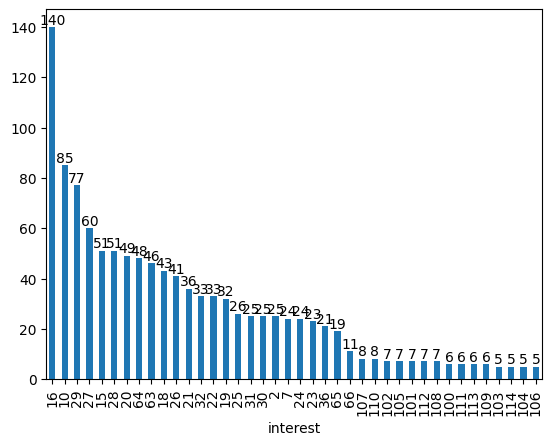

In [10]:
ax = df['interest'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 90)
plt.show()

 label the pareto of this variable to reduce the dimensionality

In [11]:
def filter_interest(df, column_name, threshold=0.8, new_column_name='filtered_interest'):
    value_counts = df[column_name].value_counts()
    total_count = value_counts.sum()
    cum_count = 0
    keep_values = []

    for value, count in value_counts.items():
        cum_count += count
        if cum_count / total_count <= threshold:
            keep_values.append(value)
        else:
            break

    filtered_df = df.copy()
    filtered_df[new_column_name] = filtered_df[column_name].apply(lambda x: x if x in keep_values else 'other')
    return filtered_df

In [12]:
df = filter_interest(df, 'interest', threshold=0.8, new_column_name='pareto_interest')


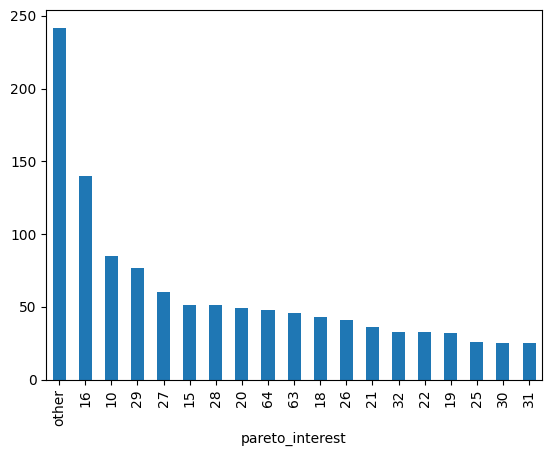

In [13]:
df['pareto_interest'].value_counts().plot(kind='bar');

Impressions is skewed with a large right tail. 

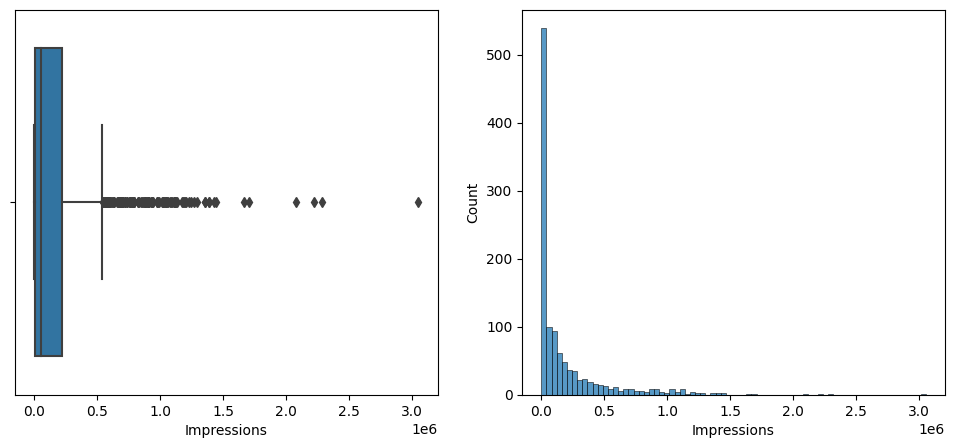

In [14]:
fig, Axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(data=df, x='Impressions', ax=Axes[0])
sns.histplot(data=df, x='Impressions', ax=Axes[1])
plt.show();

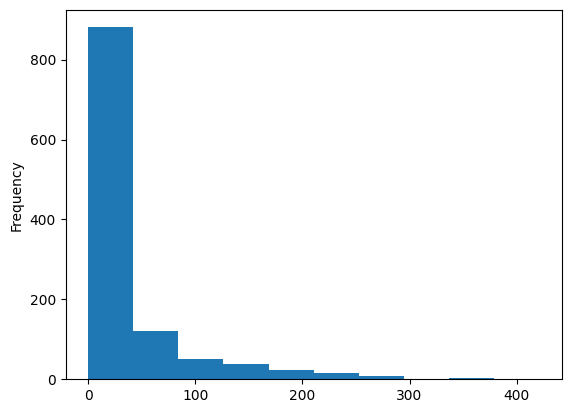

In [15]:
df['Clicks'].plot(kind='hist');

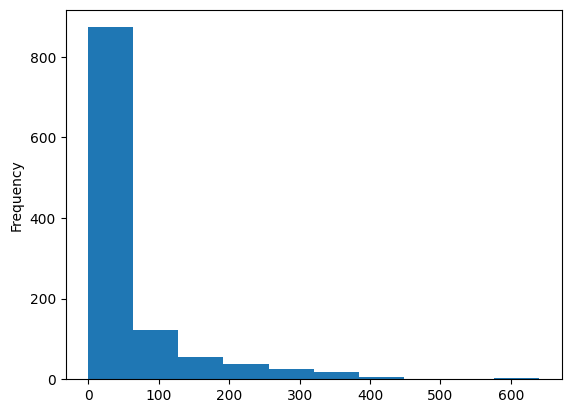

In [16]:
df['Spent'].plot(kind='hist');

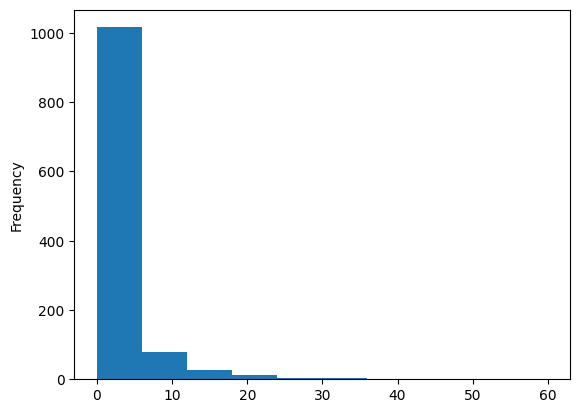

In [17]:
df['Total_Conversion'].plot(kind='hist');

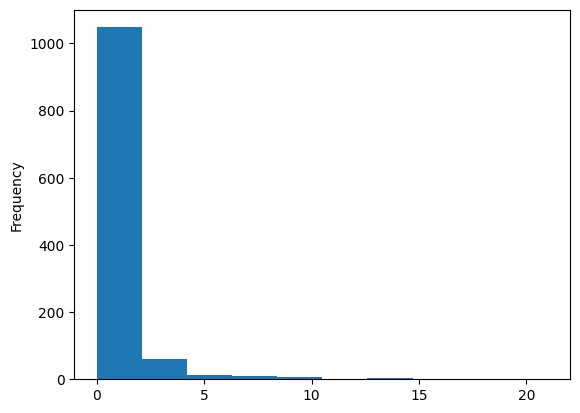

In [18]:
df['Approved_Conversion'].plot(kind='hist');

Lets create a flag to identify if the Ad converted or not

In [19]:
df['conv1'] = np.where(df['Total_Conversion'] != 0, 1, 0)
df['conv2'] = np.where(df['Approved_Conversion'] != 0, 1, 0)

In [20]:
df['conv1'].value_counts()

conv1
1    1135
0       8
Name: count, dtype: int64

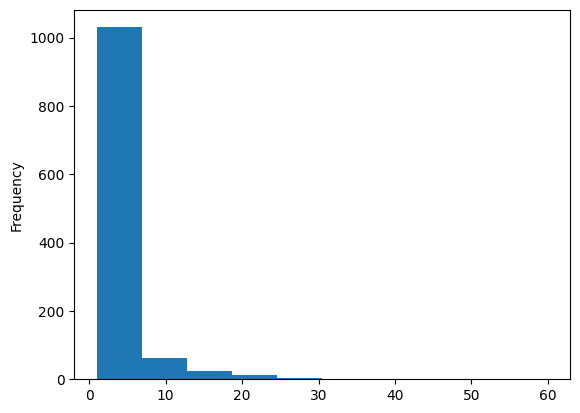

In [21]:
df.loc[df['conv1'] == 1]['Total_Conversion'].plot(kind='hist');

In [22]:
df['conv2'].value_counts()

conv2
1    584
0    559
Name: count, dtype: int64

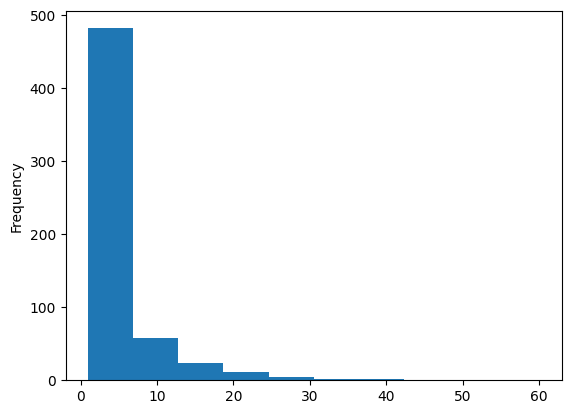

In [23]:
df.loc[df['conv2'] == 1]['Total_Conversion'].plot(kind='hist');

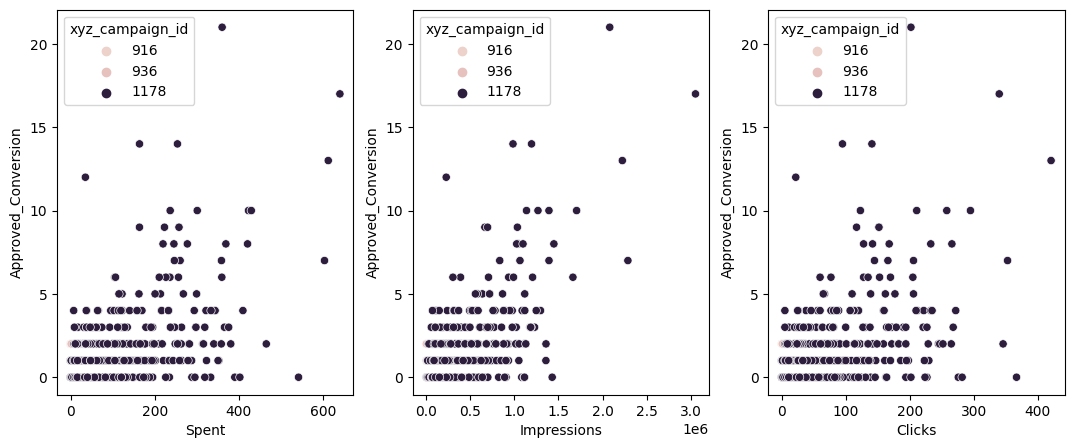

In [24]:
Fig, Axes = plt.subplots(1,3, figsize=(13,5))
sns.scatterplot(data=df, x='Spent', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[0])
sns.scatterplot(data=df, x='Impressions', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[1])
sns.scatterplot(data=df, x='Clicks', y='Approved_Conversion', hue='xyz_campaign_id', ax=Axes[2]);

Lets take a look at wich variables makes a difference if an Ad leads to conversion or not. 

In [25]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'pareto_interest', 'conv1', 'conv2'],
      dtype='object')

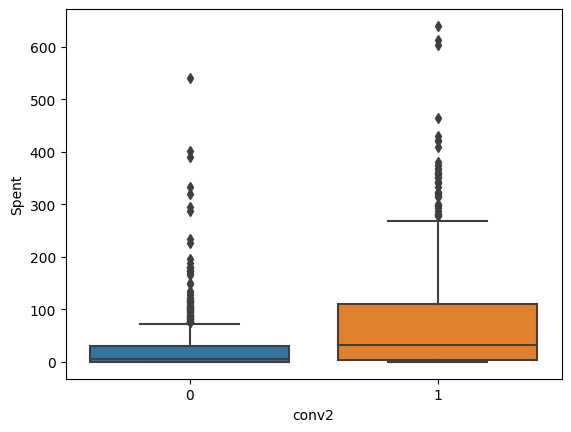

In [26]:
sns.boxplot(data=df, y='Spent', x='conv2');

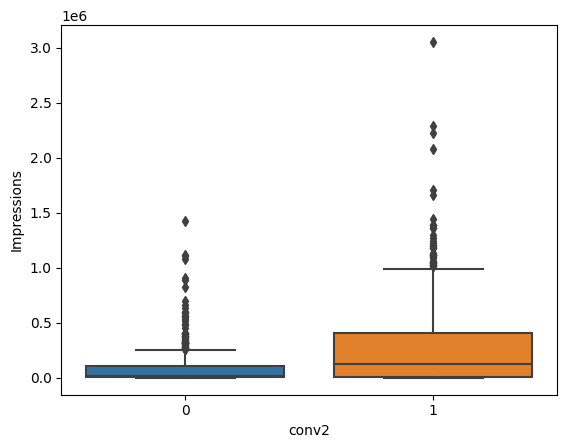

In [27]:
sns.boxplot(data=df, y='Impressions', x='conv2');

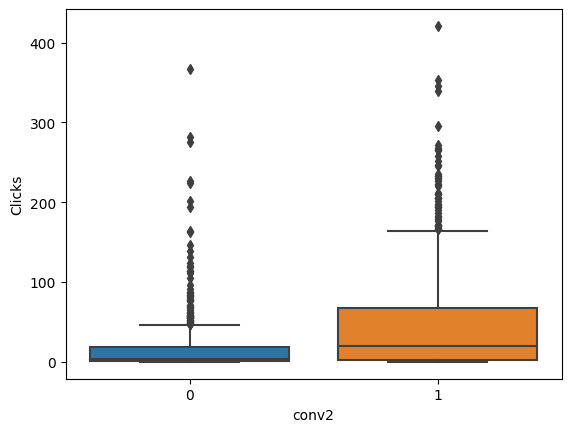

In [28]:
sns.boxplot(data=df, y='Clicks', x='conv2');

## Correlation Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  pareto_interest      1143 non-null   object 
 12  conv1                1143 non-null   int32  
 13  conv2                1143 non-null   int32  
dtypes: float64(1), int32(2), int64(8), object(3)
memory usage: 116.2+ KB


In [30]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,pareto_interest,conv1,conv2
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,15,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,16,1,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,20,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,28,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,28,1,1


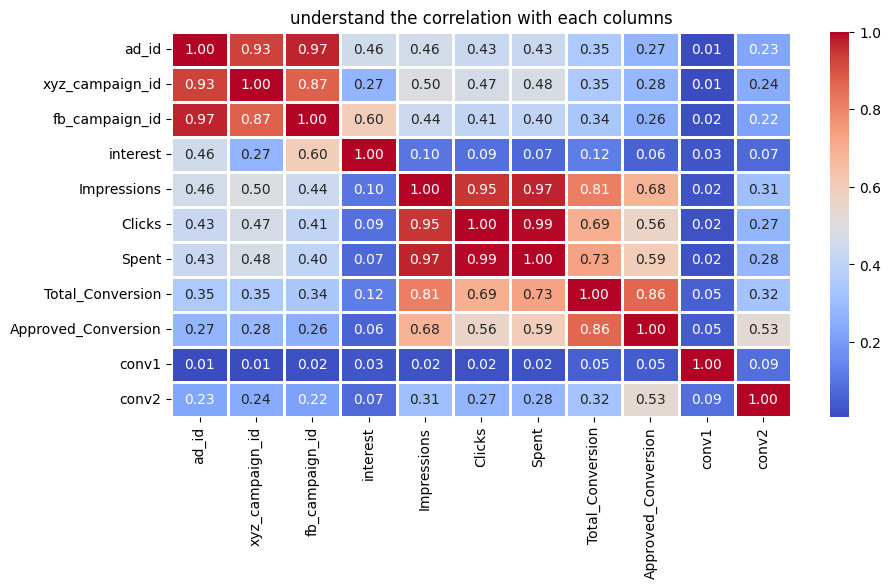

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='coolwarm',fmt='.2f',annot_kws = None,linewidths=1)
plt.title('understand the correlation with each columns')
plt.show()